## Helpdesk Issue Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#READ IN LOCAL DATA
data_raw = pd.read_excel("wingstop.xlsx")

In [3]:
print("Raw data shape:", data_raw.shape, '\n')
print(data_raw.columns)

Raw data shape: (9051, 31) 

Index(['Incident Identifier(NEOS)', 'Created Date',
       'Solution End Date Time TZ (Inc)', 'Duration Hours', 'NEOS1',
       'Team Name (Inc)', 'Master Customer Name (Inc)',
       'Master Customer Number (Inc)', 'Customer Name', 'Site Name (Inc)',
       'City (Inc)', 'Severity Code (Inc)', 'Problem Note Text (Inc)',
       'Action Notes', 'Submitter Name (Inc)',
       'Operational Catogerization Tier 1',
       'Operational Catogerization Tier 2',
       'Operational Catogerization Tier 3', 'NEOS2', 'Product Cat Tier 1',
       'Product Cat Tier 2', 'Product Cat Tier 3', 'Product Cat Tier 4',
       'Resolution Product Cat Tier 1', 'Resolution Product Cat Tier 2',
       'Resolution Product Cat Tier 3', 'Resolution Product Cat Tier 4', 'FCR',
       'RR', 'Closed by', 'Incident Status Description (Inc)'],
      dtype='object')


In [4]:
print(data_raw.dtypes)

Incident Identifier(NEOS)             object
Created Date                          object
Solution End Date Time TZ (Inc)       object
Duration Hours                        object
NEOS1                                 object
Team Name (Inc)                       object
Master Customer Name (Inc)            object
Master Customer Number (Inc)         float64
Customer Name                         object
Site Name (Inc)                       object
City (Inc)                            object
Severity Code (Inc)                  float64
Problem Note Text (Inc)               object
Action Notes                          object
Submitter Name (Inc)                  object
Operational Catogerization Tier 1     object
Operational Catogerization Tier 2     object
Operational Catogerization Tier 3     object
NEOS2                                 object
Product Cat Tier 1                    object
Product Cat Tier 2                    object
Product Cat Tier 3                    object
Product Ca

In [5]:
# FUNCTION TO EXAMINE THE NUMERIC SERIES PROVIDED AND REPLACE VALUES NOT MATCHING THE SPECIFIED
    # DTYPE WITH THE SERIES MEDIAN
    
def correct_dtype(df, series, dtype):
    df.loc[df[series].map(type) != dtype, series] \
        = df.loc[df[series].map(type) == dtype, series].median()

In [6]:
correct_dtype(data_raw, "Duration Hours", float)

In [7]:
# CORRECT DTYPES OF COLUMNS BASED ON DOMAIN KNOWLEDGE

data_raw['Severity Code (Inc)'] = data_raw['Severity Code (Inc)'].astype("object")
data_raw['FCR'] = data_raw['FCR'].astype("object")
data_raw['RR'] = data_raw['RR'].astype("object")

data_raw['Product Cat Tier 1'] = data_raw['Product Cat Tier 1'].astype("string")
data_raw['Product Cat Tier 2'] = data_raw['Product Cat Tier 2'].astype("string")
data_raw['Product Cat Tier 3'] = data_raw['Product Cat Tier 3'].astype("string")

In [8]:
# DROP COLUMNS OUTSIDE THE SCOPE OF THIS CLASSIFICATION MODEL

drop_columns= ["Incident Identifier(NEOS)", "Solution End Date Time TZ (Inc)", "NEOS1", 
               "Master Customer Name (Inc)", "Master Customer Number (Inc)", 
               "Site Name (Inc)", 'City (Inc)', "Submitter Name (Inc)", 
               "Operational Catogerization Tier 1", "Operational Catogerization Tier 2",
               "Operational Catogerization Tier 3", "Product Cat Tier 4", "Resolution Product Cat Tier 1", 
               "Resolution Product Cat Tier 2", "Resolution Product Cat Tier 3", 
               "Resolution Product Cat Tier 4", "NEOS2", "Closed by", 
               "Incident Status Description (Inc)"]
df1 = data_raw.drop(drop_columns, axis=1)
print(df1.columns)

Index(['Created Date', 'Duration Hours', 'Team Name (Inc)', 'Customer Name',
       'Severity Code (Inc)', 'Problem Note Text (Inc)', 'Action Notes',
       'Product Cat Tier 1', 'Product Cat Tier 2', 'Product Cat Tier 3', 'FCR',
       'RR'],
      dtype='object')


In [9]:
# SIMPLIFY COLUMN NAMES

cols_names= ["created","age_hours","team","cust_name","sev","problem_notes","action_notes",
            "prod_cat1","prod_cat2","prod_cat3", "FCR","RR"]
df1.columns = cols_names
df1.dtypes

created          object
age_hours        object
team             object
cust_name        object
sev              object
problem_notes    object
action_notes     object
prod_cat1        string
prod_cat2        string
prod_cat3        string
FCR              object
RR               object
dtype: object

<AxesSubplot:title={'center':'Missing Values'}, xlabel='Columns', ylabel='Percentage / Count'>

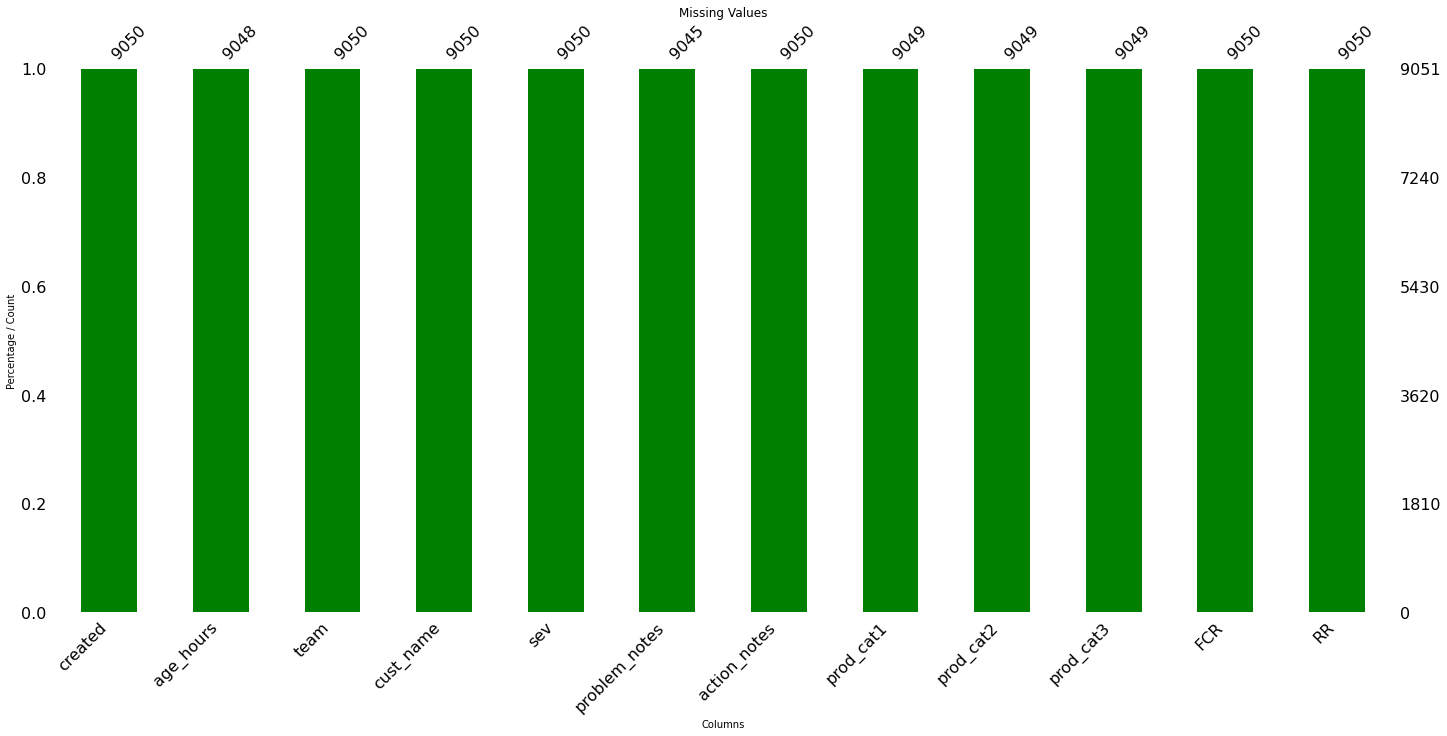

In [10]:
# CHECK FOR MISSING VALUES

import missingno as msno
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage / Count')
ax.set_title('Missing Values')
msno.bar(df1, color='green')

In [11]:
# IMPUTE MISSING VALUES IN AGE_HOURS USING MEDIAN() 

df1.age_hours.fillna(df1.age_hours.median(), inplace=True)
df1.age_hours.isna().sum()

0

## DF2

In [12]:
# VALUES FROM REMAINING CATEGORICAL /TEXT COLUMNS CANNOT BE IMPUTED, DROPPING THESE ROWS

df2 = df1.dropna()
df2.reset_index(drop=True, inplace=True)

<AxesSubplot:title={'center':'Missing Values'}, xlabel='Columns', ylabel='Percentage / Count'>

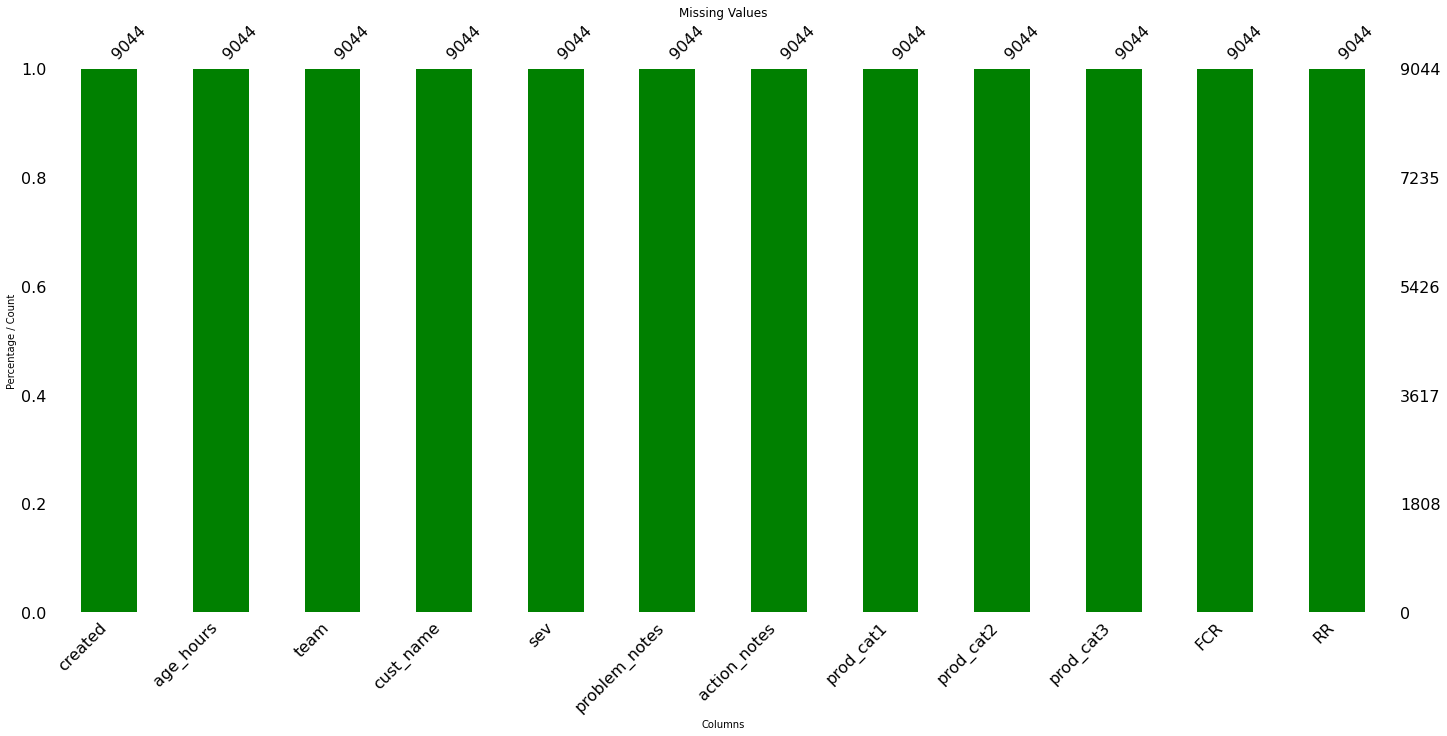

In [13]:
# MAKE SURE NO MISSING VALUES REMAIN

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage / Count')
ax.set_title('Missing Values')
msno.bar(df2, color='green')

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (Hrs)', ylabel='Count in Bin'>

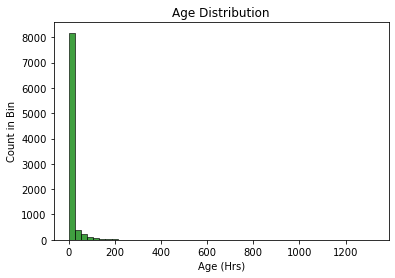

In [14]:
# CHECK FOR OUTLIERS WITHIN AGE_HOURS

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Hrs)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution')
sns.histplot(x='age_hours', data=df2, bins=50, color='green')

In [15]:
# CHECK PERCENTAGE OF CASES OUTSIDE THE TARGET THRESHOLD

print("Percentage of cases with Age > 300 hrs\n", 
      round(len(df2[df2['age_hours'] > 300]) / len(df2), 3), "%")

Percentage of cases with Age > 300 hrs
 0.002 %


In [16]:
# REPLACE OUTLIER VALUES WITH IMPUTED MEDIAN

df2.loc[df2.age_hours > 300, "age_hours"] = df2.loc[df2.age_hours < 300, "age_hours"].median()

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (Hrs)', ylabel='Count in Bin'>

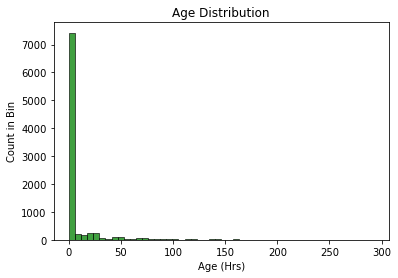

In [17]:
# CHECK FOR OUTLIERS WITHIN AGE_HOURS AGAIN

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Hrs)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution')
sns.histplot(x='age_hours', data=df2, bins=50, color='green')

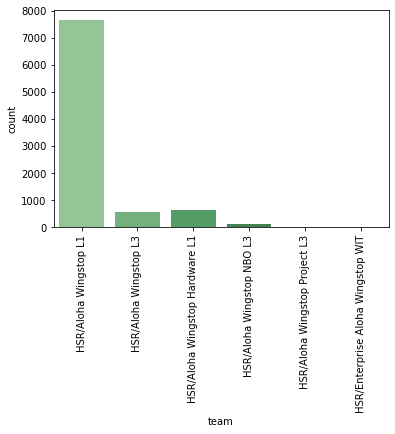

In [18]:
# CHECK DISTRIBUTION OF TEAM FEATURE

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='team', data=df2, palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

In [19]:
# ITERATE THROUGH THE TEAM SERIES, EVALUATE STR OBJECTS THAT CONTAIN 'L1' AND POPULATE 'L1' FEATURE
# VALUE OF 1 INDICATES L1, VALUE OF 0 INDICATES L3

df2["L1"] = 0
for x in range(len(df2.team)):
    if df2.team[x].find(" L1") > 0:
        df2.loc[x, "L1"] = 1
    else:
        df2.loc[x, "L1"] = 0

C:\Users\DP185257\AppData\Local\Temp/ipykernel_31944/1012552079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["L1"] = 0
C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


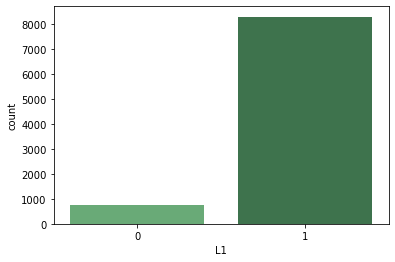

In [20]:
# SHOW CLASS BALANCE OF NEW L1 FEATURE

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='L1', data=df2, palette='Greens_d')
plt.show()

In [21]:
# MERGE TOGETHER THE TEXT COLUMNS FOR PROD_CAT, AS EVERY TICKET WILL HAVE SOME COMBINATION OF 
    # ALL 3 OF THESE TOGETHER. SO EACH COMBINATION REPRESENTS 1 CLASS IN THE CATEGORICAL FEATURE

df2["prod_cat"] = df2.prod_cat1
for i in range(len(df2.prod_cat)):
    df2.loc[i, "prod_cat"] = df2.prod_cat1[i] + "," + df2.prod_cat2[i] + "," + df2.prod_cat3[i]

df2.prod_cat.value_counts()

C:\Users\DP185257\AppData\Local\Temp/ipykernel_31944/2710615910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["prod_cat"] = df2.prod_cat1
C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


z_Third Party,Third Party SW Not Working,Third Party SW Not Working    633
z_NCR Back Office,Sales,Sales                                          497
z_Aloha POS,Front Of House,Missing employee                            450
z_NCR Back Office,Labor,Labor                                          415
z_Aloha POS,Site/Store Down,Determining File Server                    396
                                                                      ... 
z_Remote Application Loader,Failure,Wrong terminal configuration         1
z_Hosted - Insight Reports,Insight Reports,Insight Reports               1
z_Aloha Payment Solution,New Install,Outstanding Issue                   1
z_Aloha Takeout,ATO End Of Day,Stuck                                     1
z_Hosted - Insight Polling,New Install,Outstanding Issue                 1
Name: prod_cat, Length: 194, dtype: Int64

In [22]:
# DROP INDIVIDUAL PROD_CAT COLUMNS AFTER CONCAT

print("Before column drop:",df2.shape)
df2.drop(["prod_cat1", "prod_cat2", "prod_cat3"], axis=1, inplace=True)
print("After column drop:",df2.shape)

Before column drop: (9044, 14)
After column drop: (9044, 11)


C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df2.head()

,created,age_hours,team,cust_name,sev,problem_notes,action_notes,FCR,RR,L1,prod_cat
0,2022-04-01 00:11:32,0.046389,HSR/Aloha Wingstop L1,"Cnl Wings Iii, INC.",1.0,1. Site Name/Site Number (GEMS): 38 \n2. Po...,2022-03-31 23:11 - dv250157\nGeneral Informati...,1.0,0.0,1,"z_PinPad / CC Machine,Display,Incorrect Screen"
1,2022-04-01 00:23:56,0.065278,HSR/Aloha Wingstop L1,"Cnl Wings Xvii, LLC",2.0,Employee export,2022-03-31 23:23 - vb250277\nWorking Log: Fiel...,1.0,0.0,1,"z_NCR Back Office,Database,Database"
2,2022-04-01 01:09:11,0.821667,HSR/Aloha Wingstop L1,"Milton Restaurant Group, LLC",0.0,WNG - Store offline - Internet issue,2022-04-01 00:09 - dv250157\nWorking Log: Fiel...,1.0,0.0,1,"z_Third Party,Internet Service Provider,Intern..."
3,2022-04-01 01:18:08,12.002778,HSR/Aloha Wingstop L1,"10g.R.R. Lancaster, INC",0.0,WNG - All terms down,2022-04-01 00:18 - dv250157\nWorking Log: Fiel...,0.0,0.0,1,"z_Aloha POS,Site/Store Down,Determining File S..."
4,2022-04-01 02:00:32,14.766944,HSR/Aloha Wingstop L1,"Gdlp Restaurant Group, Llc",2.0,FOH-Printer rerouting,2022-04-01 01:00 - vv250206\nWorking Log: Fiel...,0.0,0.0,1,"z_Printer,Won't Print,HW Failure"


In [24]:
# CORRECT DATA TYPE AGAIN FOR VARIOUS NUMERIC COLUMNS THAT SHOULD BE CATEGORICAL

df2.FCR = [str(int(x)) for x in df2["FCR"]]
df2.RR = [str(int(x)) for x in df2["RR"]]
df2.L1 = [str(x) for x in df2["L1"]]
df2.sev = [str(int(x)) for x in df2["sev"]]
df2.dtypes

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


created           object
age_hours        float64
team              object
cust_name         object
sev               object
problem_notes     object
action_notes      object
FCR               object
RR                object
L1                object
prod_cat          string
dtype: object

In [53]:
# GENERATE TARGET (Y) VARIABLE, AN 80/20 SPLIT OF 'ACCURATE' VS 'INACCURATE', SIMULATING REAL
    # CATEGORIZATION ACCURACY

N = int(df2.shape[0] * 0.8)
K = int(df2.shape[0] * 0.2 + 1) # K zeros, N-K ones
arr = np.array([0] * K + [1] * (N))
np.random.shuffle(arr)

df2["correct_cat"] = arr
df2.correct_cat.value_counts()

C:\Users\DP185257\AppData\Local\Temp/ipykernel_31944/1816474734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["correct_cat"] = arr


1    7235
0    1809
Name: correct_cat, dtype: int64